In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import datetime as dt
import scipy.stats as st
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from scipy.stats import kruskal
import re
import missingno as msno
from tqdm import tqdm
import locale
import os #intéragir avec le système d'exploitation
import zipfile #lecture et écriture pour les fichiers zip
import urllib #gestion des url
!pip install folium
import folium
!pip install geopy
from geopy.geocoders import Nominatim
import plotly.express as px
from geopy.distance import geodesic
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import time
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.utils import shuffle
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
!pip install shap
import shap

# Données

On utilise le dataset réduit à l'aide des features importances et pour la variable EnergyStarScore

In [2]:
data_model_3 = pd.read_csv('data_model_3.csv')

In [3]:
pd.set_option('display.max_column',46)
pd.set_option('display.max_row',150)

In [4]:
col_model_3_quantitative = ['Latitude', 'Longitude', 'LargestPropertyUseTypeGFA', 
                            'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA',
                             'PropertyGFABuilding(s)(%)', 'ENERGYSTARScore']

col_model_3_categoriel = ['BuildingType','PrimaryPropertyType', 'ZipCode', 'CouncilDistrictCode',
                          'Neighborhood', 'NumberofBuildings',
                          'NumberofFloors','LargestPropertyUseType', 'SecondLargestPropertyUseType',
                          'ThirdLargestPropertyUseType', 'ComplianceStatus',
                          'AgeBuilt', 'Source_principale','Source_secondaire','Source_tertiaire']

col_target = ['TotalGHGEmissions']

In [5]:
data_model_3.head()

,Latitude,Longitude,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,PropertyGFABuilding(s)(%),ENERGYSTARScore,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,ComplianceStatus,AgeBuilt,Source_principale,Source_secondaire,Source_tertiaire,TotalGHGEmissions
0,47.61220,-122.33799,88434.0,0.0,0.0,100.000,60.0,NonResidential,Hotel,98101.0,7,Downtown,1.0,12,Hotel,None,None,Compliant,89,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),249.98
1,47.61317,-122.33393,83880.0,15064.0,4622.0,85.455,61.0,NonResidential,Hotel,98101.0,7,Downtown,1.0,11,Hotel,Parking,Restaurant,Compliant,20,NaturalGas(kBtu),Electricity(kBtu),None,295.86
2,47.61393,-122.33810,756493.0,0.0,0.0,79.425,43.0,NonResidential,Hotel,98101.0,7,Downtown,1.0,41,Hotel,None,None,Compliant,47,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),2089.28
3,47.61412,-122.33664,61320.0,0.0,0.0,100.000,56.0,NonResidential,Hotel,98101.0,7,Downtown,1.0,10,Hotel,None,None,Compliant,90,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),286.43
4,47.61375,-122.34047,123445.0,68009.0,0.0,64.688,75.0,NonResidential,Hotel,98121.0,7,Downtown,1.0,18,Hotel,Parking,Swimming Pool,Compliant,36,NaturalGas(kBtu),Electricity(kBtu),None,505.01


In [6]:
data_model_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Latitude                         1449 non-null   float64
 1   Longitude                        1449 non-null   float64
 2   LargestPropertyUseTypeGFA        1449 non-null   float64
 3   SecondLargestPropertyUseTypeGFA  1449 non-null   float64
 4   ThirdLargestPropertyUseTypeGFA   1449 non-null   float64
 5   PropertyGFABuilding(s)(%)        1449 non-null   float64
 6   ENERGYSTARScore                  953 non-null    float64
 7   BuildingType                     1449 non-null   object 
 8   PrimaryPropertyType              1449 non-null   object 
 9   ZipCode                          1449 non-null   float64
 10  CouncilDistrictCode              1449 non-null   int64  
 11  Neighborhood                     1449 non-null   object 
 12  NumberofBuildings   

In [7]:
# On supprime les bâtiments sans EnergyStarScore
data_model_3.dropna(subset=col_target, inplace=True)

In [8]:
data_model_3.isnull().sum()

Latitude                             0
Longitude                            0
LargestPropertyUseTypeGFA            0
SecondLargestPropertyUseTypeGFA      0
ThirdLargestPropertyUseTypeGFA       0
PropertyGFABuilding(s)(%)            0
ENERGYSTARScore                    496
BuildingType                         0
PrimaryPropertyType                  0
ZipCode                              0
CouncilDistrictCode                  0
Neighborhood                         0
NumberofBuildings                    0
NumberofFloors                       0
LargestPropertyUseType               0
SecondLargestPropertyUseType         0
ThirdLargestPropertyUseType          0
ComplianceStatus                     0
AgeBuilt                             0
Source_principale                    0
Source_secondaire                    0
Source_tertiaire                     0
TotalGHGEmissions                    0
dtype: int64

In [9]:
data_model_3.dropna(inplace=True)

In [10]:
print('Il y a', data_model_3.shape[0], 'bâtiments dans le dataset.')

Il y a 953 bâtiments dans le dataset.


# Fonctions

In [11]:
def cross_validation (pipeline_svm) :   
    mean_scores = []

    for i in range(2, 30):
        # Calculer le score R² en utilisant une validation croisée 
        cross_val_r2 = cross_val_score(pipeline_svm, X, y, scoring='r2', cv=i)

        # Calculer le score R² moyen
        mean_r2 = np.mean(cross_val_r2)

        # Stocker le score R² moyen dans la liste
        mean_scores.append(mean_r2)

    max_index = np.argmax(mean_scores)
    max_coords = (max_index + 2, mean_scores[max_index])

    # Créer un graphique des scores R² moyens en fonction de k
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(2, 30), y=mean_scores, marker='o')
    plt.scatter(*max_coords, color='red')  # Ajouter le point le plus haut en rouge
    plt.title('Score R² moyen en fonction du nombre de plis (k)')
    plt.xlabel('Nombre de plis (k)')
    plt.ylabel('Score R² moyen')
    plt.xticks(np.arange(2, 30, 2))

    # Afficher les coordonnées du point le plus haut
    plt.annotate(f'Coordonnées\n({max_coords[1]:.4f} ; {max_coords[0]:.0f})', max_coords,
                 textcoords="offset points", xytext=(0,-20), ha='center', color='red')

    plt.show()
    return max_coords 

In [12]:
def model_info (pipeline) :
    print('CrossValidation')
    print('--------------------------------------')
    # Afficher les scores R² pour chaque pli
    print(f"Scores R² pour chaque pli (k={max_coords[0]}): {cross_val_r2}")

    # Afficher le score R² moyen
    print(f"Score R² moyen (k={max_coords[0]}): {np.mean(cross_val_r2)}")


    y_train_predict = pipeline.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    r2 = r2_score(y_train, y_train_predict)
    print('\n') 
    print('La performance du modèle sur la base d\'apprentissage')
    print('--------------------------------------')
    print('L\'erreur quadratique moyenne est (RMSE) {}'.format(rmse))
    print('Le score R2 est {}'.format(r2))
    print('\n')

    # model evaluation for testing set
    y_test_predict = pipeline.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)

    print('La performance du modèle sur la base de test')
    print('--------------------------------------')
    print('L\'erreur quadratique moyenne est (RMSE) {}'.format(rmse))
    print('Le score R2 est {}'.format(r2))

# RandomForest

In [13]:
X = data_model_3.drop(col_target, axis=1)
y = data_model_3[col_target]
X, y = shuffle(X, y)

In [14]:
# Colonnes catégorielles
categorical_columns = col_model_3_categoriel

# Créer un transformateur pour les colonnes catégorielles
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), col_model_3_quantitative),
        ('cat', OneHotEncoder(handle_unknown='ignore'), col_model_3_categoriel),
    ],
    remainder='passthrough'
)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# Transformation logarithmique
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [17]:
# Mise en forme unidimensionel
# Avant
y_train = y_train.values

# Après
y_train = np.ravel(y_train)

In [18]:
# Créer le pipeline
pipeline_randomforest = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforest', RandomForestRegressor(n_estimators=150, random_state=0) )])

# Modèle SVM
pipeline_randomforest.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline_randomforest.predict(X_test)

In [19]:
# Mise en forme unidimensionel
# Avant
y = y.values

# Après
y = np.ravel(y)

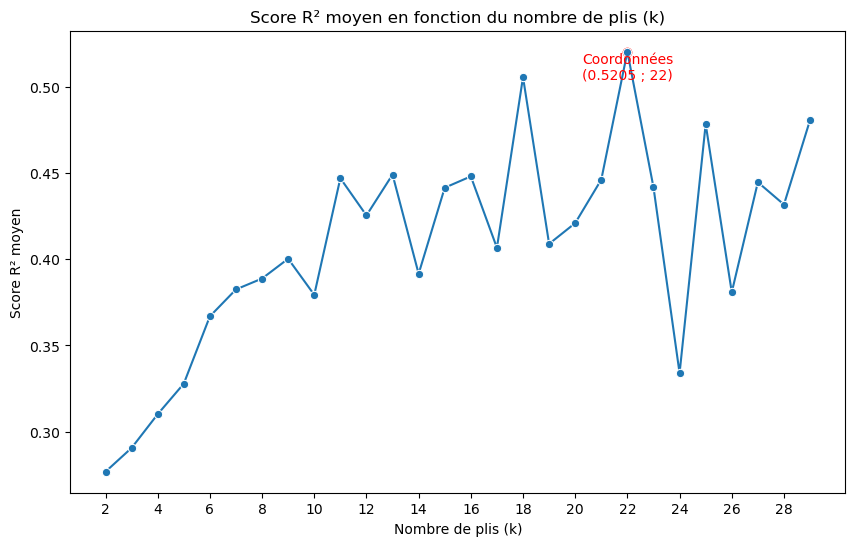

In [20]:
max_coords = cross_validation(pipeline_randomforest)

In [21]:
cross_val_r2 = cross_val_score(pipeline_randomforest, X, y, scoring='r2', cv=max_coords[0])

In [22]:
model_info(pipeline_randomforest)

CrossValidation
--------------------------------------
Scores R² pour chaque pli (k=22): [ 0.72262298  0.67426305  0.65132966  0.44872852  0.54586975  0.68266482
  0.45750604  0.58769107  0.17226085  0.4653922   0.6492901   0.87569172
  0.62619549  0.38044458  0.60433681 -0.73926838  0.84197572  0.73528996
  0.53287426  0.5446702   0.55604333  0.43409065]
Score R² moyen (k=22): 0.5204528809553642


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.23591954581399743
Le score R2 est 0.9715357936259337


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.5574814104593666
Le score R2 est 0.8237082484891732


In [23]:
# Grille de valeurs d'hyperparamètres à explorer
param_grid_random = {
    'randomforest__n_estimators': [50, 100, 150, 200],
}

# Recherche d'hyperparamètres avec validation croisée
grid_search_random = GridSearchCV(estimator=pipeline_randomforest, param_grid=param_grid_random, scoring='r2', cv=max_coords[0])
grid_search_random.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params_random = grid_search_random.best_params_
print(f'Best Hyperparameters for Random Forest : {best_params_random}')

Best Hyperparameters for Random Forest : {'randomforest__n_estimators': 200}


# Comparaison sans EnergyStarScore

In [24]:
# On retire la variable EnergyStarScore du dataset
data_model_3.drop('ENERGYSTARScore', axis=1)
print(data_model_3.columns)

Index(['Latitude', 'Longitude', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'PropertyGFABuilding(s)(%)', 'ENERGYSTARScore', 'BuildingType',
       'PrimaryPropertyType', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'ComplianceStatus', 'AgeBuilt', 'Source_principale',
       'Source_secondaire', 'Source_tertiaire', 'TotalGHGEmissions'],
      dtype='object')


In [25]:
X = data_model_3.drop(col_target, axis=1)
y = data_model_3[col_target]
X, y = shuffle(X, y)

In [26]:
# Colonnes catégorielles
categorical_columns = col_model_3_categoriel

# Créer un transformateur pour les colonnes catégorielles
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), col_model_3_quantitative),
        ('cat', OneHotEncoder(handle_unknown='ignore'), col_model_3_categoriel),
    ],
    remainder='passthrough'
)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
# Transformation logarithmique
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [29]:
# Mise en forme unidimensionel
# Avant
y_train = y_train.values

# Après
y_train = np.ravel(y_train)

In [30]:
# Créer le pipeline
pipeline_randomforest = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforest', RandomForestRegressor(n_estimators=150, random_state=0) )])

# Modèle SVM
pipeline_randomforest.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline_randomforest.predict(X_test)

In [31]:
# Mise en forme unidimensionel
# Avant
y = y.values

# Après
y = np.ravel(y)

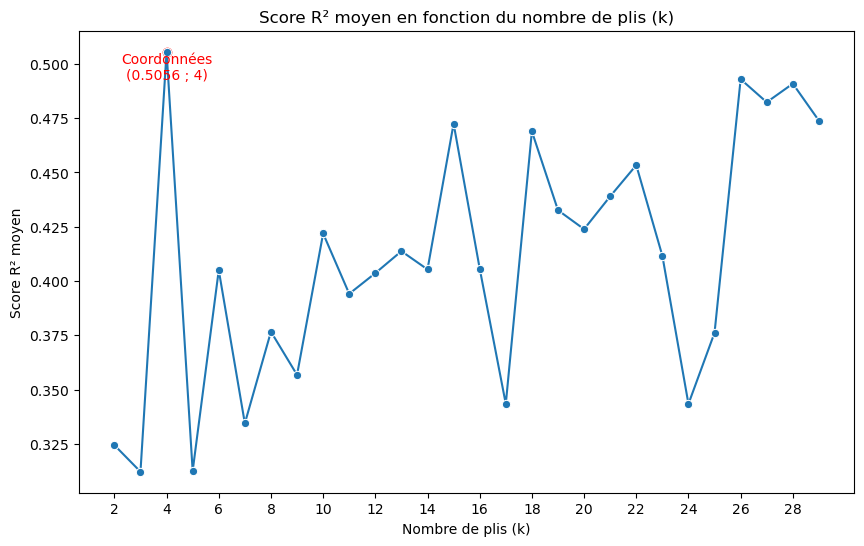

In [32]:
max_coords = cross_validation(pipeline_randomforest)

In [33]:
cross_val_r2 = cross_val_score(pipeline_randomforest, X, y, scoring='r2', cv=max_coords[0])

In [34]:
# Grille de valeurs d'hyperparamètres à explorer
param_grid_random = {
    'randomforest__n_estimators': [50, 100, 150, 200],
}

# Recherche d'hyperparamètres avec validation croisée
grid_search_random = GridSearchCV(estimator=pipeline_randomforest, param_grid=param_grid_random, scoring='r2', cv=max_coords[0])
grid_search_random.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params_random = grid_search_random.best_params_
print(f'Best Hyperparameters for Random Forest : {best_params_random}')

Best Hyperparameters for Random Forest : {'randomforest__n_estimators': 150}


In [35]:
model_info(pipeline_randomforest)

CrossValidation
--------------------------------------
Scores R² pour chaque pli (k=4): [0.68547315 0.32668853 0.51356097 0.49674642]
Score R² moyen (k=4): 0.505617268463689


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.22426238904312823
Le score R2 est 0.9729548058686729


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est (RMSE) 0.7328585391896028
Le score R2 est 0.7492978618392405


# Feature importance sans ENERGYSTARSCORE

  0%|          | 0/191 [00:00<?, ?it/s]

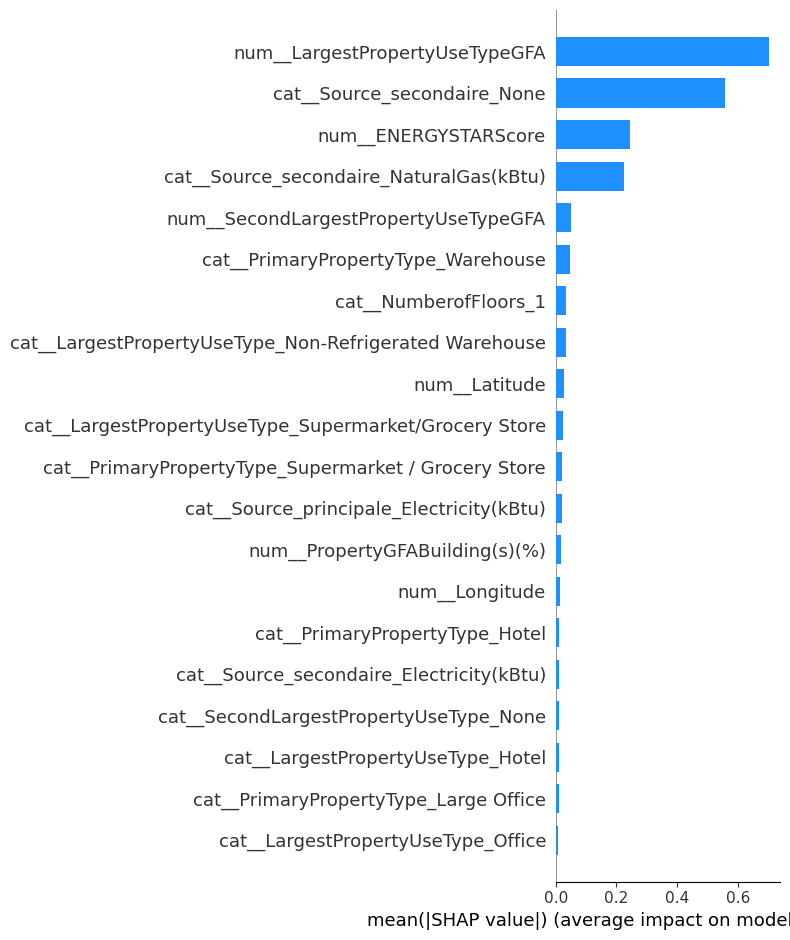

In [36]:
# Appliquer le préprocesseur et transformer les données d'entraînement
X_train_processed = preprocessor.fit_transform(X_train)

# Aplatir y_train
y_train_flat = y_train.ravel()

# Initialiser le modèle RandomForest et le former sur les données prétraitées
randomforest = RandomForestRegressor()
randomforest.fit(X_train_processed, y_train_flat)

# Réduire le jeu de données avec kmeans (regroupement)
background_data = shap.kmeans(X_train_processed, 50) 

# Créer l'explainer SHAP avec le modèle RandomForest et les données prétraitées
explainer = shap.KernelExplainer(randomforest.predict, background_data, 
                                 feature_perturbation="correlation_dependent")

# Calculer les valeurs SHAP pour l'ensemble du jeu de test
shap_vals = explainer.shap_values(preprocessor.transform(X_test))

# Visualiser les valeurs SHAP
shap.summary_plot(shap_vals, preprocessor.transform(X_test),
                  feature_names=preprocessor.get_feature_names_out(),
                  plot_type="bar",
                  color="dodgerblue"
                  )

In [39]:
X.train

AttributeError: 'DataFrame' object has no attribute 'train'

# Conclusion

Lors de l'intégration de la variable ENERGYSTARScore nous avons supprimé 496 bâtiments qui n'avaient pas de donnée pour cette variable. 

Le score R2 du randomforest est de 0,81 en incluant la variable. Si au contraire on retire la variable du jeu de donnée (qui est maintenant réduit) on obtient un score R2 de 0,75. 